In [1]:
import matplotlib.pyplot as plt
import numpy as np

# network size N
N = 5000

# number of edges
M = N*30

## initialize time
T = 0
## choose Tmax
Tmax = 1000


In [2]:
uniform_extinction_times = [9.44186831, 9.3568655, 9.6234322, 10.77947796, 10.67747593,
   11.6221177, 12.87429115, 12.82296105, 13.80463983, 15.96204043,
   18.00676332,   19.58295945,   22.038786,     25.52417976,   28.07121729,
   34.57071886,   49.80285566,   77.69063026,  305.67023423, 1000       ]

print(np.linspace(0, 0.018, 20))
b_array = np.linspace(0, 0.018, 20)


[0.         0.00094737 0.00189474 0.00284211 0.00378947 0.00473684
 0.00568421 0.00663158 0.00757895 0.00852632 0.00947368 0.01042105
 0.01136842 0.01231579 0.01326316 0.01421053 0.01515789 0.01610526
 0.01705263 0.018     ]


In [5]:
b_crit = (0.01705263 + 0.018)/2
print(b_crit)


0.017526315


In [19]:
from scipy.optimize import curve_fit
import numpy as np

y = np.array([9.44186831, 9.3568655, 9.6234322, 10.77947796, 10.67747593,
   11.6221177, 12.87429115, 12.82296105, 13.80463983, 15.96204043,
   18.00676332,   19.58295945,   22.038786,     25.52417976,   28.07121729,
   34.57071886,   49.80285566,   77.69063026      ])

x = np.array([0.,         0.00094737, 0.00189474, 0.00284211, 0.00378947, 0.00473684,
 0.00568421, 0.00663158, 0.00757895, 0.00852632, 0.00947368, 0.01042105,
 0.01136842, 0.01231579, 0.01326316, 0.01421053, 0.01515789, 0.01610526])

# Define the Model
def f(b, a): return (np.log(N) + 1) / (1-(b/b_crit))**a

# res.x contains your coefficients
res = curve_fit(f, x, y)
print(res)


(array([0.82588259]), array([[2.87923381e-05]]))


In [6]:
model = []
model_b = np.linspace(0, 0.0173, 1000)
for b in model_b:
    estimate = (np.log(N) + 1) / (1-(b/b_crit))**0.82588259
    model.append(estimate)


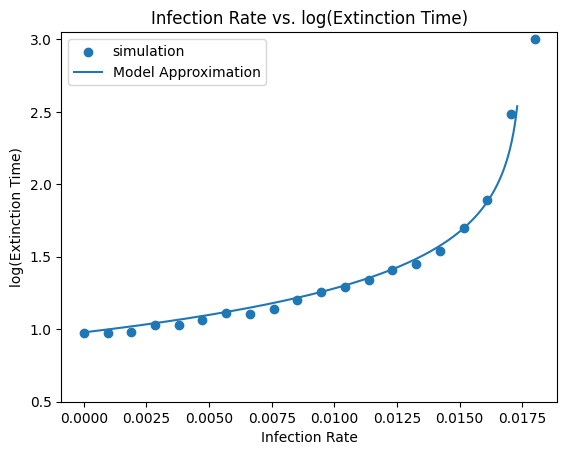

In [12]:
import matplotlib.pyplot as plt
plt.scatter(b_array, np.log10(uniform_extinction_times), label = 'simulation')
plt.plot(model_b, np.log10(model), label = 'Model Approximation')
plt.legend()
plt.ylim(0.5, 3.05)
plt.title('Infection Rate vs. log(Extinction Time)')
plt.ylabel('log(Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()


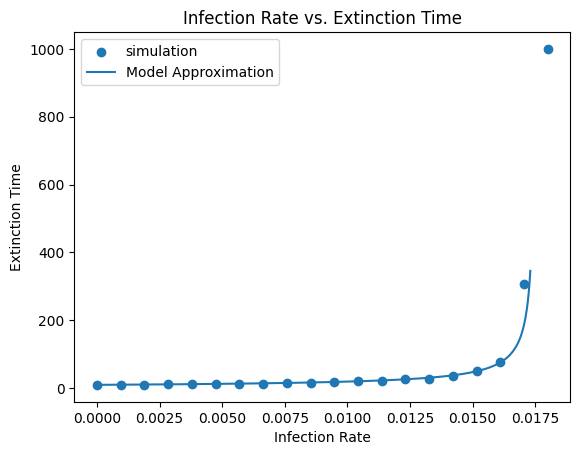

In [11]:
import matplotlib.pyplot as plt
plt.scatter(b_array, uniform_extinction_times, label = 'simulation')
plt.plot(model_b, model, label = 'Model Approximation')
plt.legend()
plt.title('Infection Rate vs. Extinction Time')
plt.ylabel('Extinction Time')
plt.xlabel('Infection Rate')
plt.show()
